In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.switch_backend('agg')
from matplotlib import rc,rcParams
from collections import OrderedDict 

In [5]:
def plot_grouped_bar_chart(error_dict,xticklabels,figname,title,uq_bar=None,bbox=(1.01, 1.05),yl=1.0,color=['r','b','c','y','g','m','k','orange','olive',(0.502, 0.000, 0.502)]):
    last_idx=(0.502, 0.000, 0.502)
    print('bar chart')
    print(error_dict[list(error_dict.keys())[0]])
    
    N=len(error_dict[list(error_dict.keys())[0]])
    
    fig, ax = plt.subplots(1,1,figsize=(7,4))

    ind = np.arange(N)    # the x locations for the groups
    width1 = .09       # the width of the bars
    #width2=0
    bars=list()
    k=1
    for idx,model_name in enumerate(error_dict.keys()):
        #print(model_name,len(error_dict[model_name]))
        if uq_bar[model_name] is None:
            _p = ax.bar(ind+((idx-k)*width1), error_dict[model_name], width1, bottom=0,color=color[idx])
        else:
            _p = ax.bar(ind+((idx-k)*width1), error_dict[model_name], width1, bottom=0,color=color[idx],yerr=uq_bar[model_name],align='center',ecolor='black',capsize=10)
        bars.append(_p)
    
    
    ax.set_xticks(ind + width1/ 2)
   
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
        # specify integer or one of preset strings, e.g.
        #tick.label.set_fontsize('x-small')
        #tick.label.set_rotation(45)
   
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
   
    ax.set_xticklabels(xticklabels)
    ax.set_ylim([0, yl])
    #ax.set_xlabel("National",fontsize=24)
    #ax.set_ylabel('RMSE',fontsize=24)
    ax.set_title(figname+' '+title)
    #ax.legend(bars,error_dict.keys(),fontsize=20,bbox_to_anchor=(1.01, 1.05))
    ax.legend(bars,error_dict.keys(),fontsize=20,bbox_to_anchor=bbox)
    #fig.tight_layout()
    #fig.savefig(figname+'-'+title+'.png',dpi=500)
    #fig.savefig(figname+'-'+title+'.png')


In [6]:
ttl_nodes_nat=93579
original=OrderedDict()
orig=np.array([874,3157,74,127,954])/ttl_nodes_nat #R1,R2,R3,R7,R8
original['National']=np.array([orig[0],orig[1], orig[2],orig[3],orig[4]])

In [ ]:
def genfigureGain_vs_baseline_naerm(original,k,region='National',path='fig/',alpha=0.7,inline=True):
    title=""
    xticklabels=['R1','R2','R3','R4','R5']
    baseline1=OrderedDict()
    baseline1['DIHen']= (np.array([44,11,10])/k)/original[region]
    baseline1['Deg']= (np.array([16,4,2])/k)/original[region]
    baseline1['IC1']= (np.array([23,8,5])/k)/original[region]
    baseline1['IC0.5']= (np.array([21,8,3])/k)/original[region]
    baseline1['IC0.2']= (np.array([18,9,4])/k)/original[region]
     
    num_rules=5
    mean_gain=np.zeros(num_rules)
    print('Mean gain')
    for i in range(num_rules):
        mean_gain[i]=((baseline1['DIHen'][i]/baseline1['Deg'][i])+(baseline1['DIHen'][i]/baseline1['IC1'][i])+(baseline1['DIHen'][i]/baseline1['IC0.5'][i])+(baseline1['DIHen'][i]/baseline1['IC0.2'][i]))/4
    
    print(mean_gain)
    
    color1=['r','b','g','olive','cyan']
    
    plot_grouped_bar_chart(baseline1,xticklabels,"",title,bbox=(0.5,0.25),yl=90,color=color1) #R1


bar chart
[64.96679518 56.10768675 47.98683735 42.08076506 32.92635301]


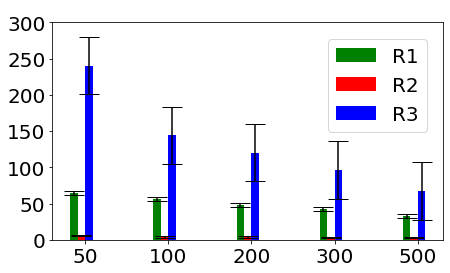

In [15]:
def genfigureGain_vs_K_urbannet(original,K,region='National',path='fig/',alpha=0.7,inline=True):
    title=""
    xticklabels=['50','100','200','300','500']
    b1=np.array([64.96679518,56.10768675,47.98683735,42.08076506,32.92635301]) #v>=345
    b2=np.array([6.229545346,3.681094977,3.964256129,3.492320876,3.058140443]) #near-mil
    b3=np.array([240.3151515,144.1890909,120.1575758,96.12606061,67.28824242]) #v>=345+near-mil
    baseline1=OrderedDict()
    baseline1['R1']= b1
    baseline1['R2']= b2
    baseline1['R3']= b3
    error=OrderedDict()
    error['R1']=[2.637745729,2.637745729,2.637745729,2.637745729,2.637745729]
    error['R2']=[0.995325409,0.995325409,0.995325409,0.995325409,0.995325409]
    error['R3']=[39.65501412,39.65501412,39.65501412,39.65501412,39.65501412]
    color1=['g','r','b']
    #color1=['r','b','g','olive','cyan','peru','orange']
    
    plot_grouped_bar_chart(baseline1,xticklabels,"",title,error=error,bbox=(0.68,0.45),yl=300,color=color1) #R 

ttl_nodes_nat=118956
original=OrderedDict()
orig=np.array([0.01395473957,0.03531557887,0.0008322404923]) #R1,R2,R3
original['National']=np.array([orig[0],orig[1], orig[2]])

K=[50,100,200,300,500]
genfigureGain_vs_K_urbannet(original,K)


In [20]:
def genfigureGain_vs_K(original,K,region='National',path='fig/',alpha=0.7,inline=True):
    title="" #naerm-eval
    xticklabels=['50','100','200','300','500']
    b1=np.array([2,6,19,35,65])/K #v>=345
    b2=np.array([6,13,22,28,49])/K #near-mil
    b3=np.array([0,3,4,6,14])/K #v>=345+near-mil
    b7=np.array([0,1,3,3,7])/K #load>=300
    b8=np.array([4,8,10,13,26])/K #near-NG
    baseline1=OrderedDict()
    baseline1['R1']= b1/original[region][0]
    baseline1['R2']= b2/original[region][1]
    baseline1['R3']= b3/original[region][2]
    baseline1['R7']= b7/original[region][3]
    baseline1['R8']= b8/original[region][4]
    
    error=OrderedDict()
    error['R1']=[1.520453528,1.520453528,1.520453528,1.520453528,1.520453528]
    error['R2']=[0.447223522,0.447223522,0.447223522,0.447223522,0.447223522]
    error['R3']=[11.43786016,11.43786016,11.43786016,11.43786016,11.43786016]
    error['R7']=[2.009074257,2.009074257,2.009074257,2.009074257,2.009074257]
    error['R8']=[0.792125855,0.792125855,0.792125855,0.792125855,0.792125855]
    color1=['g','r','b','y','cyan']
    #color1=['r','b','g','olive','cyan','peru','orange']
    
    plot_grouped_bar_chart(baseline1,xticklabels,"",title,bbox=(0.28,0.25),yl=60,color=color1,error=error) #R 


In [7]:
def genfigureGain_vs_ablation(original,k,region='National',path='fig/',alpha=0.7,inline=True):
    title=""
    xticklabels=['R1','R2','R3']
    model=['CB','FP','NER','RG']
    ablation=OrderedDict()
    ablation['DIHen']= (np.array([35,8,6])/k)/original[region]
    ablation['CB']= (np.array([35,8,6])/k)/original[region]
    ablation['FP']= (np.array([23,8,5])/k)/original[region]
    ablation['NER']= (np.array([23,8,5])/k)/original[region]
    ablation['RG']= (np.array([18,9,4])/k)/original[region]
    
    num_rules=3
    mean_gain=np.zeros(num_rules)
    print('Mean gain')
    for i in range(num_rules):
        mean_gain[i]=((ablation['DIHen'][i]-ablation[model[0]][i])+(ablation['DIHen'][i]-ablation[model[1]][i])+(ablation['DIHen'][i]-ablation[model[2]][i])+(ablation['DIHen'][i]-ablation[model[3]][i]))/4
    
    print(mean_gain)
    
    color=['r',(1.000, 0.753, 0.796),(0.502, 0.000, 0.502),(0.941, 0.902, 0.549),(0.741, 0.718, 0.420),(0.502, 0.000, 0.502)]
    plot_grouped_bar_chart(ablation,xticklabels,"",title,bbox=(0.65,0.25),yl=270,color=color) #R1
    

bar chart
[ 4.28279176  6.42418764 10.17163043 12.49147597 13.91907323]


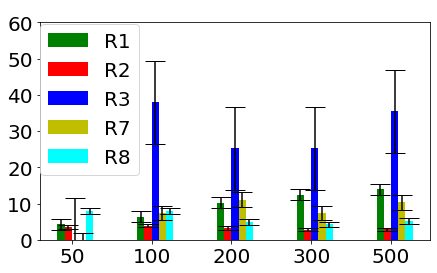

In [21]:
K=[50,100,200,300,500]
genfigureGain_vs_K(original,K)

#genfigureGain_vs_ablation(original,k)

In [49]:
def genfigureuncertain(var_gain,data,path='fig/',alpha=0.7,inline=True):
    title='variance'
    xticklabels=['R1','R2','R3']
    color1=['g','r','b']
    error=OrderedDict()
    error[data]= var_gain
    if data=='naerm':
        xticklabels=['R1','R2','R3','R7','R8']
        error['R7']= var_gain[3]
        error['R8']= var_gain[4]
        color1=['g','r']
    
    print(var_gain)
    y=int(max(var_gain)+60)
    plot_grouped_bar_chart(error,xticklabels,"",title,bbox=(0.48,0.45),yl=y,color=color1) #R 


[9.49356605e+00 9.87269800e-01 1.43567577e+03]
bar chart
[9.49356605e+00 9.87269800e-01 1.43567577e+03]


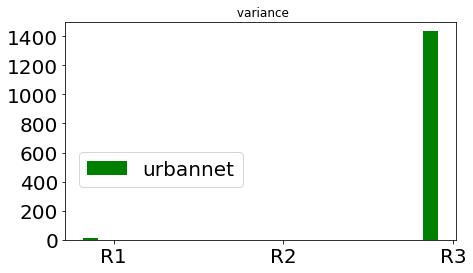

In [50]:
var_gain_urbannet=np.array([9.493566053,0.9872698,1435.675775])
#var_gain_naerm=np.array([])

genfigureuncertain(var_gain_urbannet,'urbannet')

#genfigureuncertain('naerm',var_gain_naerm,'naerm')

# APPENDIX RESULTS

Mean gain
[13.26401544 -1.68071429]
bar chart
[23.25745174  4.03371429]


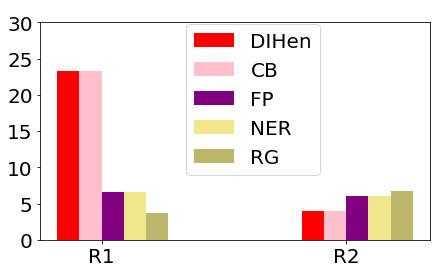

In [18]:
# Ablation for other datasets
def genfigureGain_vs_ablation(ablation_reg,original,k,yl,region,num_rules=3,path='fig/',alpha=0.7,inline=True):
    title=""
    #xticklabels=['R1','R2','R3']
    xticklabels=['R1','R2']
    model=['CB','FP','NER','RG']
    ablation=OrderedDict()
    ablation['DIHen']= ablation_reg['DIHen']/original[region]
    for m in model:
        ablation[m]= ablation_reg[m]/original[region]
        ablation[m]= ablation_reg[m]/original[region]
        ablation[m]= ablation_reg[m]/original[region]
        ablation[m]= ablation_reg[m]/original[region]
    
    num_rules=num_rules
    mean_gain=np.zeros(num_rules)
    print('Mean gain')
    for i in range(num_rules):
        mean_gain[i]=((ablation['DIHen'][i]-ablation[model[0]][i])+(ablation['DIHen'][i]-ablation[model[1]][i])+(ablation['DIHen'][i]-ablation[model[2]][i])+(ablation['DIHen'][i]-ablation[model[3]][i]))/4
    
    print(mean_gain)
    
    color=['r',(1.000, 0.753, 0.796),(0.502, 0.000, 0.502),(0.941, 0.902, 0.549),(0.741, 0.718, 0.420),(0.502, 0.000, 0.502)]
    plot_grouped_bar_chart(ablation,xticklabels,"",title,bbox=(0.65,0.25),yl=yl,color=color) #R1

#ORIGINAL
original=OrderedDict()
#original['National']=np.array([0.01395473957,0.03531557887,0.0008322404923])
original['EIC']=np.array([0.01417327094,0.03168699792,0.001014308512])
#original['ERCOT']=np.array([0.02751806205,0.02974925627,0.001168720782])
original['ERCOT']=np.array([0.02751806205,0.02974925627])
    
#EIC
k=50
ablation1=OrderedDict()
ablation1['DIHen']= np.array([39,5,5])/k
ablation1['CB']= np.array([39,5,5])/k
ablation1['FP']= np.array([21,6,3])/k
ablation1['NER']= np.array([21,7,3])/k
ablation1['RG']= np.array([17,3,1])/k
region='EIC'
#genfigureGain_vs_ablation(ablation1,original,k,150,region)

#ERCOT
k=50
ablation2=OrderedDict()
ablation2['DIHen']= np.array([32,6])/k
ablation2['CB']= np.array([32,6])/k
ablation2['FP']= np.array([9,9])/k
ablation2['NER']= np.array([9,9])/k
ablation2['RG']= np.array([5,10])/k
region='ERCOT'
genfigureGain_vs_ablation(ablation2,original,k,30,region,num_rules=2)

#ERCOT
k=200
ablation2=OrderedDict()
ablation2['DIHen']= np.array([56,12,1])/k
ablation2['CB']= np.array([56,12,1])/k
ablation2['FP']= np.array([28,30,2])/k
ablation2['NER']= np.array([25,30,1])/k
ablation2['RG']= np.array([26,15,1])/k
region='ERCOT'
#genfigureGain_vs_ablation(ablation2,original,k,20,region)


Mean gain
[14.35420849  0.84035714]
bar chart
[23.25745174  4.03371429]
bar chart
[23.25745174  4.03371429]


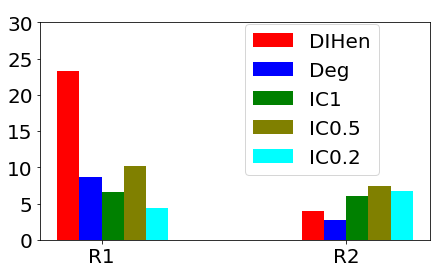

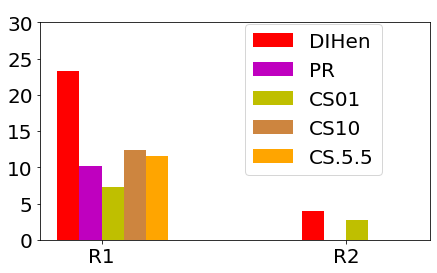

In [22]:
#ORIGINAL
original=OrderedDict()
#original['National']=np.array([0.01395473957,0.03531557887,0.0008322404923])
original['EIC']=np.array([0.01417327094,0.03168699792,0.001014308512])
#original['ERCOT']=np.array([0.02751806205,0.02974925627,0.001168720782])
original['ERCOT']=np.array([0.02751806205,0.02974925627])
#Baseline for EIC
k=50
eic=OrderedDict()
eic['DIHen']=np.array([39,5,5])/k
eic['Deg']=np.array([20,6,3])/k
eic['IC1']=np.array([21,6,3])/k
eic['IC0.5']=np.array([21,9,3])/k
eic['IC0.2']=np.array([18,2,0])/k
eic['PR']=np.array([3,2,0])/k
eic['CS01']=np.array([13,2,1])/k
eic['CS10']=np.array([6,2,0])/k
eic['CS.5.5']=np.array([12,3,1])/k

region='EIC'
#genfigureGain_vs_baseline(eic,original,k,region,150,150)

#Baseline for ERCOT
k=50
tx=OrderedDict()
tx['DIHen']=np.array([32,6])/k
tx['Deg']=np.array([12,4])/k
tx['IC1']=np.array([9,9])/k
tx['IC0.5']=np.array([14,11])/k
tx['IC0.2']=np.array([6,10])/k
tx['PR']=np.array([14,0])/k
tx['CS01']=np.array([10,4])/k
tx['CS10']=np.array([17,0])/k
tx['CS.5.5']=np.array([16,0])/k

region='ERCOT'
genfigureGain_vs_baseline(tx,original,k,region,30,30,num_rules=2)
